In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/zoo.csv")

In [3]:
df.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,b'aardvark',b'true',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',4.0,b'false',b'false',b'true',b'mammal'
1,b'antelope',b'true',b'false',b'false',b'true',b'false',b'false',b'false',b'true',b'true',b'true',b'false',b'false',4.0,b'true',b'false',b'true',b'mammal'
2,b'bass',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',b'true',0.0,b'true',b'false',b'false',b'fish'
3,b'bear',b'true',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',4.0,b'false',b'false',b'true',b'mammal'
4,b'boar',b'true',b'false',b'false',b'true',b'false',b'false',b'true',b'true',b'true',b'true',b'false',b'false',4.0,b'true',b'false',b'true',b'mammal'


In [4]:
df.isnull().sum()

,0
animal,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [13]:
X = df.drop(["animal", "type"], axis=1)

# List of columns to convert from byte string boolean to int
boolean_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                'fins', 'tail', 'domestic', 'catsize']

for col in boolean_cols:
    if col in X.columns:
        # Apply a function to decode byte strings and convert to 0 or 1
        X[col] = X[col].apply(lambda x: 1 if isinstance(x, bytes) and x.decode('utf-8').lower() == 'true' else (0 if isinstance(x, bytes) and x.decode('utf-8').lower() == 'false' else x))
        # Ensure the column is of numeric type
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data types after conversion and before scaling:")
print(X.dtypes)
print("\nScaled data:")
print(X_scaled[:5]) # Display first 5 rows of scaled data

Data types after conversion and before scaling:
hair        float64
feathers    float64
eggs        float64
milk        float64
airborne    float64
aquatic     float64
predator    float64
toothed     float64
backbone    float64
breathes    float64
venomous    float64
fins        float64
legs        float64
tail        float64
domestic    float64
catsize     float64
dtype: object

Scaled data:
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.57253971  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.57253971  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -1.40443503  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.  

In [9]:
X = df.drop(["animal", "type"], axis=1)

# Convert byte string boolean columns to boolean and then to int
for col in X.columns:
    if X[col].dtype == 'object':
        # Decode byte strings and check if they are 'true' or 'false'
        X[col] = X[col].apply(lambda x: x.decode('utf-8').lower() if isinstance(x, bytes) else x)
        # Convert 'true' to 1 and 'false' to 0
        X[col] = X[col].replace({'true': 1, 'false': 0})

# Display data types after conversion
print(X.dtypes)

hair         object
feathers     object
eggs         object
milk         object
airborne     object
aquatic      object
predator     object
toothed      object
backbone     object
breathes     object
venomous     object
fins         object
legs        float64
tail         object
domestic     object
catsize      object
dtype: object


In [11]:
# Let's examine the conversion for a single boolean column, e.g., 'hair'
col_to_examine = 'hair'

# Get the column from the original dataframe
col_data = df[col_to_examine]

# Apply the conversion steps
converted_col_data = col_data.astype(str).str.lower().replace({'b\'true\'': 1, 'b\'false\'': 0})

# Display the original and converted data, and the data type
print("Original data:")
print(col_data.head())
print("\nConverted data:")
print(converted_col_data.head())
print("\nData type of converted data:")
print(converted_col_data.dtype)

Original data:
0     b'true'
1     b'true'
2    b'false'
3     b'true'
4     b'true'
Name: hair, dtype: object

Converted data:
0    1
1    1
2    0
3    1
4    1
Name: hair, dtype: int64

Data type of converted data:
int64


/tmp/ipython-input-95465812.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  converted_col_data = col_data.astype(str).str.lower().replace({'b\'true\'': 1, 'b\'false\'': 0})


In [14]:
linked = linkage(X_scaled, method='ward')

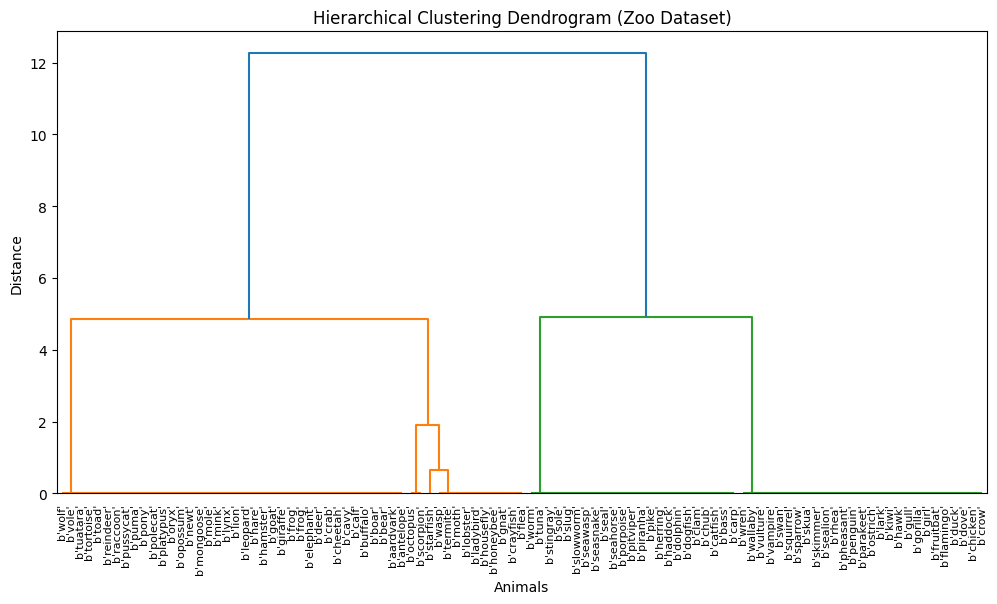

In [15]:
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=df["animal"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram (Zoo Dataset)")
plt.xlabel("Animals")
plt.ylabel("Distance")
plt.show()

In [17]:
clusters = fcluster(linked, 7, criterion='maxclust')
df["Cluster"] = clusters

In [19]:
print(df[["animal", "type", "Cluster"]].head(20))

         animal             type  Cluster
0   b'aardvark'        b'mammal'        1
1   b'antelope'        b'mammal'        1
2       b'bass'          b'fish'        5
3       b'bear'        b'mammal'        1
4       b'boar'        b'mammal'        1
5    b'buffalo'        b'mammal'        1
6       b'calf'        b'mammal'        1
7       b'carp'          b'fish'        5
8    b'catfish'          b'fish'        5
9       b'cavy'        b'mammal'        1
10   b'cheetah'        b'mammal'        1
11   b'chicken'          b'bird'        6
12      b'chub'          b'fish'        5
13      b'clam'  b'invertebrate'        5
14      b'crab'  b'invertebrate'        1
15  b'crayfish'  b'invertebrate'        3
16      b'crow'          b'bird'        6
17      b'deer'        b'mammal'        1
18   b'dogfish'          b'fish'        5
19   b'dolphin'        b'mammal'        5
